# Визуализация, понижение размерности
### Пример 1
<img src='images/dimensionality_reduction.png'>
У выборки (яркие точки) три размерности (три признака). 

Если убрать один признак (ось Z), то получится двумерная выборка (бледные точки), но классы всё еще хорошо будут разделяться между собой.

### Пример 2
<img src='images/PCA.png'>
Оба признака значимы, но все данные можно спроецировать на зелёную прямую, практически не потеряв никакой информации.
Признаки линейно зависимые (есть избыточность в данных).

В данном случае нельзя просто выбросить один из признаков, нужно сформировать новый признак на основе двух исходных.

### Пример 3
<img src='images/PCA2.png'>
Можно спроецировать выборку на кривую сложной формы и сделать данные одномерными.

Задача понижения размерности - это формирование новых признаков на основе исходных. Количество признаков должно уменьшиться, но они должны сохранять в себе как можно больше информации, присутствующей в исходных данных. 

## 1. PCA (Principal Component Analysis), Метод главных компонент

Один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации

Вычисление главных компонент может быть сведено к вычислению сингулярного разложения матрицы данных или к вычислению собственных векторов и собственных значений ковариационной матрицы исходных данных 🤯

Пусть имеется набор $m$ точек ${x^{(1)} , …, x^{(m)}}$ в пространстве $ℝ^n$ , и мы хотим подвергнуть их сжатию с потерей информации, т. е. сохранить точки в меньшем объеме памяти, возможно, ценой некоторой потери точности. Но хотелось бы свести эти потери к минимуму.

## 2. tSNE
Один из алгоритмов множественного обучения (manifold learning algorithms).

Идея, лежащая в основе алгоритма t-SNE, заключается в том, чтобы найти двумерное представление данных, сохраняющее расстояния между точками наилучшим образом. t-SNE начинает свою работу со случайного двумерного представления каждой точки данных, а затем пытается сблизить точки, которые в пространстве исходных признаков находятся близко друг к другу, и отдаляет друг от
друга точки, которые находятся далеко друг от друга. При этом t-SNE уделяет большее внимание сохранению расстояний между точками, близко расположенными друг к другу. Иными словами, он пытается сохранить информацию, указывающую на то, какие точки являются соседями друг другу.

In [8]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
digits = load_digits()

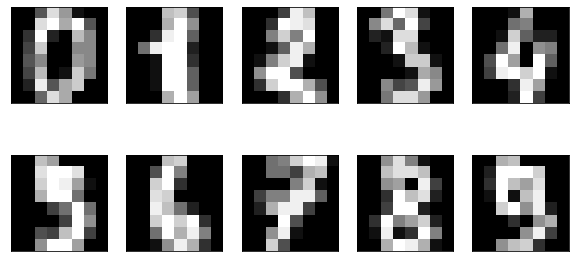

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap='gray')

Применим PCA

In [9]:
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
# преобразуем данные рукописных цифр к первым двум компонентам
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

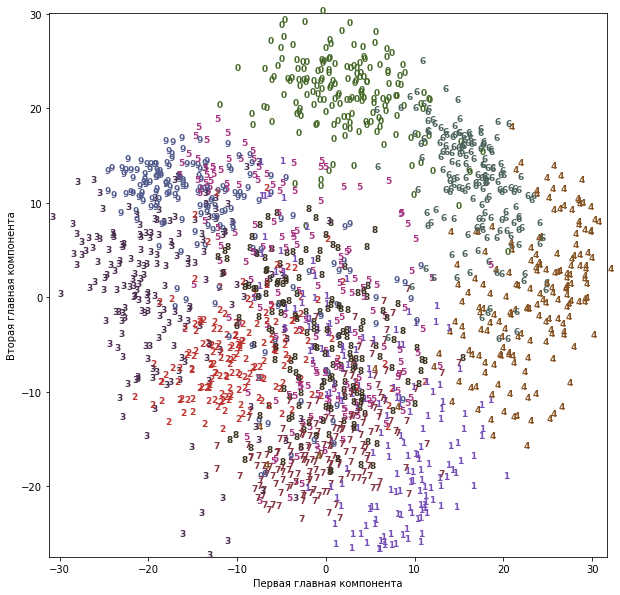

In [12]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента");

Цифры неплохо разделены с помощью только первых двух компонент, но классы сильно перекрывают друг друга

Применим t-SNE

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

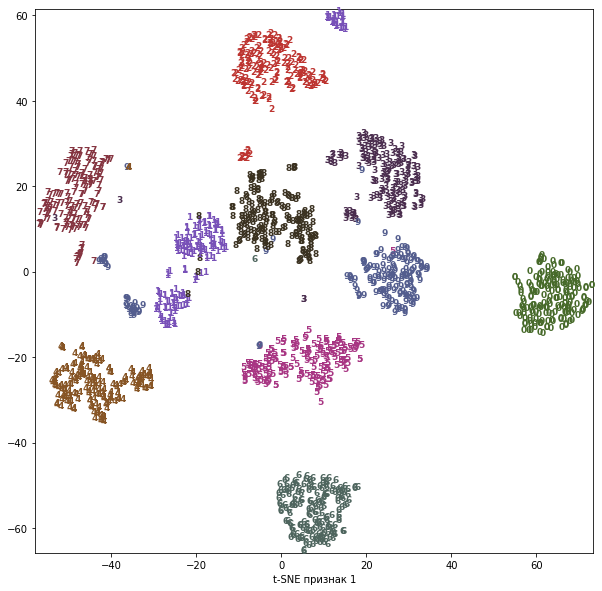

In [15]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # строим график, где цифры представлены символами вместо точек
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE признак 0")
plt.xlabel("t-SNE признак 1");

Разделение более точное, но некоторые кластеры распадаются (9 и 1)